In [2]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('pima-indians-diabetes.csv', header=None, names=col_names)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Question: Can we predict the diabetes status of a patient given their health measurements?

In [6]:
# definging X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

# split X and y across train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train, y_train)

# make a class prediction for the testing set
y_pred_class = log_reg.predict(X_test)

# calculating classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6770833333333334


### Null Accuracy

The accuracy that could always be achieved by always predicting the most frequest class

In [9]:
# examine the class distribution of the testing set (using a pandas series method)
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [8]:
# calculate the percentage of ones
y_test.mean()

0.3229166666666667

In [10]:
# calcluate percentage of 0s
1 - y_test.mean()

0.6770833333333333

In [11]:
# calculate null acurracy (for binary calssification problems as 0 / 1)
max(1 - y_test.mean(), y_test.mean())

0.6770833333333333

In [13]:
# calculate null accuracy for multiclass classification problems
y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: label, dtype: float64

### Confusion Matrix

In [15]:
# first argument is true value, second argument is predicted value
print(metrics.confusion_matrix(y_test, y_pred_class))

[[114  16]
 [ 46  16]]


In [16]:
# print out first 25 true and predicted values
print('True: ', y_test.values[0:25])
print('Pred: ', y_pred_class[0:25])

True:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred:  [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [20]:
# finding TP, FP, TN, FN
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

### Metrics Computed From Confusion Matrix

1. Classification accuracy: Overally, how often is the classifier correct ?

In [24]:
print((TP + TN) / (TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6770833333333334
0.6770833333333334


2. Classification Error: How often is the classifier incorrect ?

In [25]:
print((FP + FN) / (TP + FP + TN + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.3229166666666667
0.32291666666666663


3. Sensitivity / Recall: When the actual value is positive, how often is the prediction correct ?

In [26]:
print(TP / (TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.25806451612903225
0.25806451612903225


4. Specificity: When the actual value us negative, how often is the prediction correct ?

In [27]:
print(TN / (TN + FP))

0.8769230769230769


5. False Positive Rate : When the actual value is negatuve, how often is the prediction incorrect ?

In [29]:
print(FP / (TN + FP))

0.12307692307692308


6. Precision: When a positive value is predicted, how often is the prediction correct ?

In [32]:
print(TP / (TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.5
0.5


## Adjusting The Classification Threshold

In [33]:
# print first 10 predicted response values
log_reg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [34]:
# print first 10 predicted probabilities of class membership
log_reg.predict_proba(X_test)[0:10, :]

array([[0.61405867, 0.38594133],
       [0.7505398 , 0.2494602 ],
       [0.74167648, 0.25832352],
       [0.60291327, 0.39708673],
       [0.88426611, 0.11573389],
       [0.87695895, 0.12304105],
       [0.50819992, 0.49180008],
       [0.44582289, 0.55417711],
       [0.77950769, 0.22049231],
       [0.25853303, 0.74146697]])

In [38]:
# print the first 10 predicted probabilities for class 1
log_reg.predict_proba(X_test)[0:10, 1]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

In [36]:
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

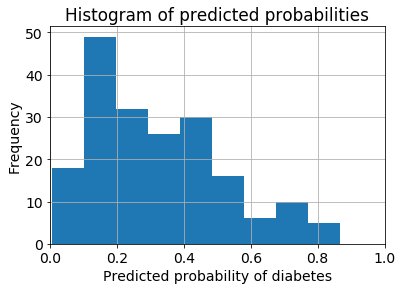

In [47]:
# visualize with matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14

# histogram of predicted probabiltites
plt.hist(y_pred_prob, bins='auto')
plt.xlim(0, 1)
plt.grid()
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')


### Decrease the threshold to increase sensitivity

In [63]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [64]:
y_pred_prob[0:10]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

In [66]:
# previous confusion matrix
confusion

array([[114,  16],
       [ 46,  16]])

In [67]:
# new confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[82, 48],
       [17, 45]])

In [69]:
# check specificity (increased from 0.25)
print(45 / (45 + 17))

0.7258064516129032


In [70]:
# check specificity (decreased from 0.88)
print(82 / (82 + 48))

0.6307692307692307


## ROC Curves and Area Under The Curve (AUC)

ROC Curve helps check how sensitivity and specificity are affected by various thresholds without actually changing the threshold.

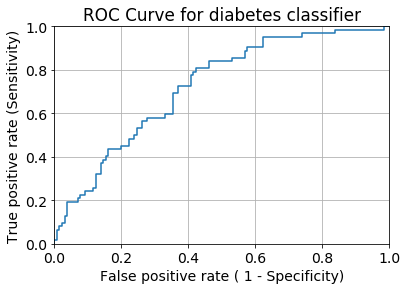

In [72]:
# first argument is true value, second argument is predicted probabilitites
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for diabetes classifier')
plt.xlabel('False positive rate ( 1 - Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid()

In [78]:
# helper functiuon that accepts threshold and prints pout sensitivity and specificity

def evaluate_threshold(threshold):
    print('Sensitivity: ', tpr[thresholds > threshold][-1])
    print('Specificity: ', 1 - fpr[thresholds > threshold][-1])
    
evaluate_threshold(0.5)

Sensitivity:  0.25806451612903225
Specificity:  0.8769230769230769


In [79]:
evaluate_threshold(0.3)

Sensitivity:  0.7258064516129032
Specificity:  0.6307692307692307


## AUC

In [81]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.7227047146401985

In [84]:
# calculate cross validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(log_reg, X, y, cv=10, scoring='roc_auc').mean()

0.7425071225071225